In [12]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Import the dataset of World Happiness report.

#### The main objective of the project is to predict the "Happiness score" of each country based on various features provided (Economy, Family support, GDP, Corruption of government, Freedom, Generosity and Dystopia residual is column used to compare the happiness score with each country.) 

In [13]:
data = pd.read_csv("happiness_score_dataset.csv")
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Exploratory Data Analysis

#### We have got to know about number of rows and columns, We need to have High level undertanding and statistical description of the data so that we can Analyse the data cleanly. Using describe method we can have staistics of dataframe

In [14]:
print(data.shape)
data.describe()

(158, 12)


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [15]:
data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### There are no missing values and 2 categorical varibles which are to be dealt with.  

### Let us visualize the interaction between the happiness score and the other six factors that are tracked by the World Happiness Index

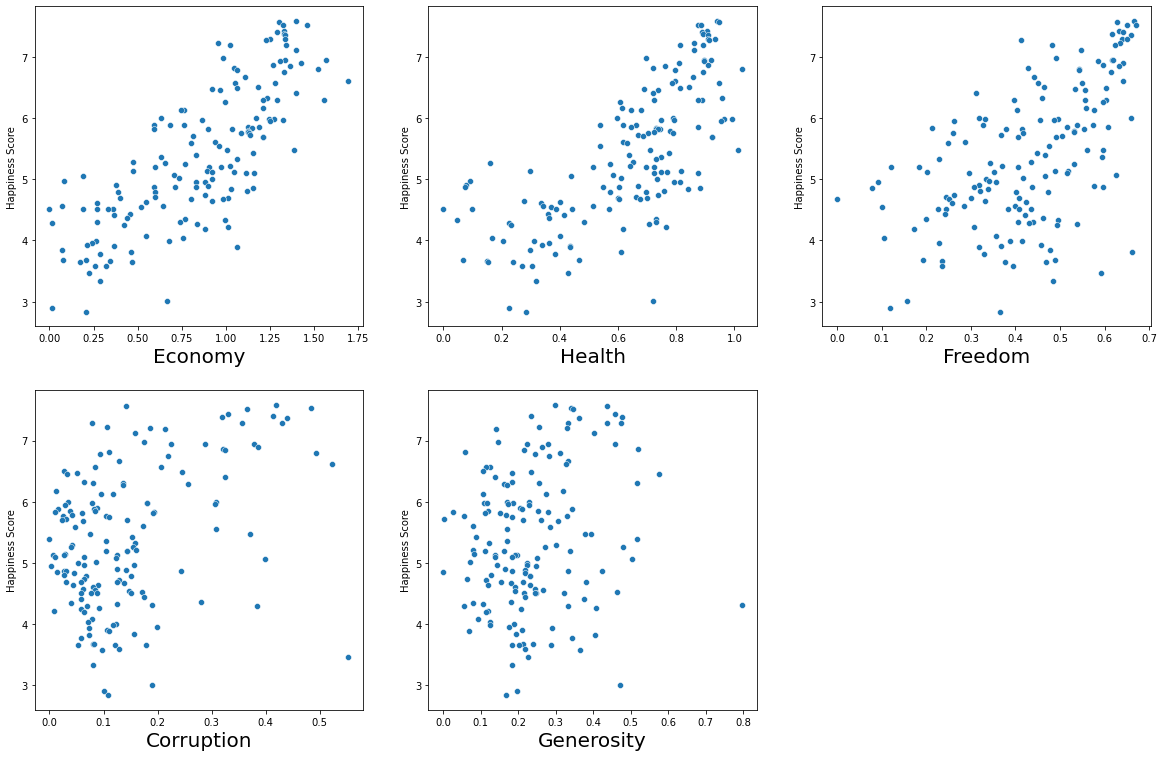

In [17]:
#visualizing the relationship between independent and dependent variables
plt.figure(figsize=(20,20),facecolor='w')
ax = plt.subplot(3,3,1)

sns.scatterplot(data['Economy (GDP per Capita)'],y=data['Happiness Score'])
plt.xlabel('Economy',fontsize=20)

ax = plt.subplot(3,3,2)
sns.scatterplot(data['Health (Life Expectancy)'],data['Happiness Score'])
plt.xlabel('Health',fontsize=20)

ax = plt.subplot(3,3,3)
sns.scatterplot(data['Freedom'],data['Happiness Score'])
plt.xlabel('Freedom',fontsize=20)

ax = plt.subplot(3,3,4)
sns.scatterplot(data['Trust (Government Corruption)'],data['Happiness Score'])
plt.xlabel('Corruption',fontsize=20)

ax = plt.subplot(3,3,5)
sns.scatterplot(data['Generosity'],data['Happiness Score'])
plt.xlabel('Generosity',fontsize=20)

plt.show()

### Freedom and Economy of country has linear relationship with Happiness score. 
#### The countries with higher GDP per capita are  to have higher Happiness score.

#### We can see some skewness in the features (Trust, Generosity), But as these are important features and we have less information at the point to perform any analysis on these features. Let us deal with outliers

## Dealing with outliers 

#### We can see that we can handle few outliers from the data. As these are important features collected for less number of rows, we have to be very carefull when removing any data. 


In [24]:
from scipy.stats import zscore
z_score  = zscore(data[['Economy (GDP per Capita)','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']])
abs_z_score = np.abs(z_score)
filter_entry = (abs_z_score<3).all(axis=1)
data = data[filter_entry]
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,79.882353,5.363778,0.048065,0.840907,0.991133,0.627272,0.423900,0.133468,0.231976,2.115138
std,45.092440,1.126367,0.017288,0.392277,0.273563,0.247047,0.150184,0.105668,0.119735,0.544523
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,42.000000,4.550000,0.037290,0.546490,0.860400,0.438730,0.321120,0.059890,0.145740,1.785550
50%,80.000000,5.212000,0.044120,0.901980,1.032760,0.696390,0.430540,0.105010,0.213330,2.110320
75%,118.000000,6.130000,0.052320,1.151740,1.216240,0.809250,0.542100,0.173830,0.296780,2.465310
max,158.000000,7.587000,0.136930,1.563910,1.402230,1.013280,0.669730,0.438440,0.576300,3.602140


## Let us visualize the correlation between the features available after the outlier removal

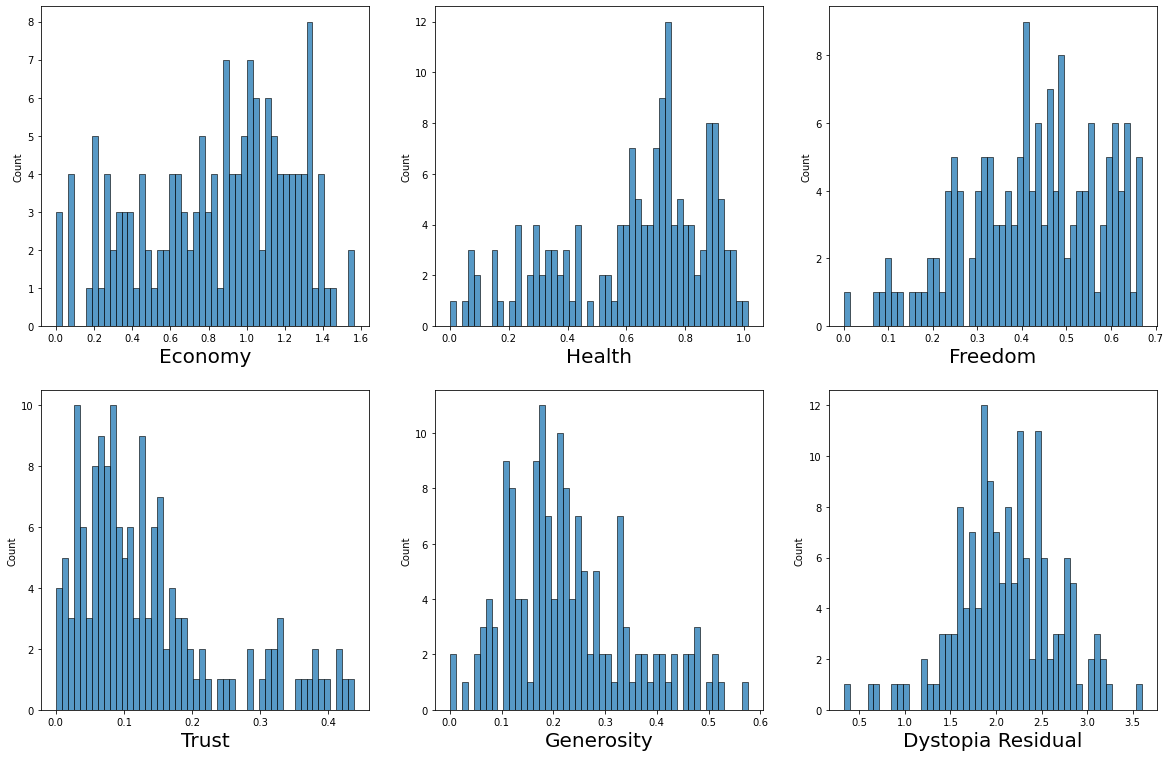

In [25]:
#Let us visualize skewness of data using Histplot.

plt.figure(figsize=(20,20),facecolor='w')
ax = plt.subplot(3,3,1)
sns.histplot(data['Economy (GDP per Capita)'],bins=50)
plt.xlabel('Economy',fontsize=20)

ax = plt.subplot(3,3,2)
sns.histplot(data['Health (Life Expectancy)'],bins=50)
plt.xlabel('Health',fontsize=20)

ax = plt.subplot(3,3,3)
sns.histplot(data['Freedom'],bins=50)
plt.xlabel('Freedom',fontsize=20)

ax = plt.subplot(3,3,4)
sns.histplot(data['Trust (Government Corruption)'],bins=50)
plt.xlabel('Trust',fontsize=20)

ax = plt.subplot(3,3,5)
sns.histplot(data['Generosity'],bins=50)
plt.xlabel('Generosity',fontsize=20)

ax = plt.subplot(3,3,6)
sns.histplot(data['Dystopia Residual'],bins=50)
plt.xlabel('Dystopia Residual',fontsize=20)

plt.show()

## Checking for Multi-collinearity between predictors: 

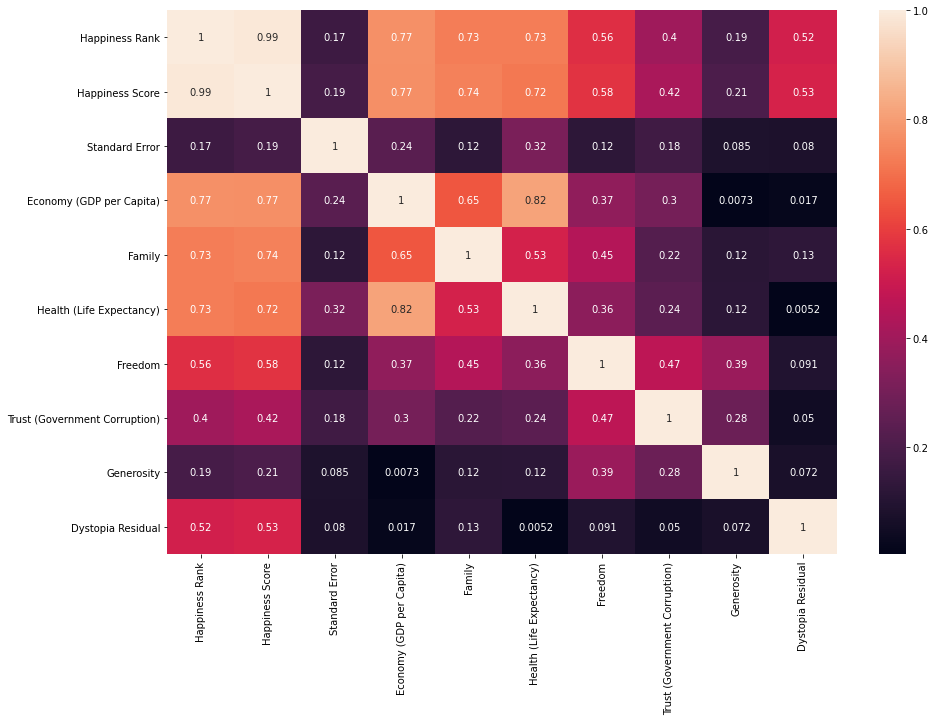

In [26]:
#let us get co-relation of one variable vs another
data_corr = data.corr().abs()

#visualizing the multicollinearity
plt.figure(figsize=(15,10))
sns.heatmap(data_corr,annot=True)
plt.show()

### We can see that there is no much correlation with the features available.  
### PS: Happiness score is the target.
### Healthy life expectance and GDP per capita has positive relation.
### GDP per capita and Score has strong positive relation - higher the GDP per capita, higher the rank.

#### Let us proceed with building the model

In [27]:
#removing categorical features as we have ranks which specify the countries. And removing target from the data set.
X = data.drop(columns=['Country','Region','Happiness Score','Dystopia Residual','Happiness Rank'])
y = data['Happiness Score']
X.describe() 

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.048065,0.840907,0.991133,0.627272,0.423900,0.133468,0.231976
std,0.017288,0.392277,0.273563,0.247047,0.150184,0.105668,0.119735
min,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.037290,0.546490,0.860400,0.438730,0.321120,0.059890,0.145740
50%,0.044120,0.901980,1.032760,0.696390,0.430540,0.105010,0.213330
75%,0.052320,1.151740,1.216240,0.809250,0.542100,0.173830,0.296780
max,0.136930,1.563910,1.402230,1.013280,0.669730,0.438440,0.576300


## Standardizing and scaling the data
#### Data standardization is done as to make sure that data is internally consistent; that is, each data type has the same content and format. Standardized values are useful for tracking data that isn't easy to compare otherwise.

In [28]:
#importing the standardscaler library from sklearn
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

In [29]:
X_scaled.shape

(153, 7)

## Model Building

### Let us build the model which helps in learning and generalizing from training data and test the unexposed data.
 
### Let us use linear regression and see how well it fits our data.
### But first, splitting the dataset into train and test data sets.

In [30]:
#importing the train_test_split library from sklearn
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=335)

In [31]:
#importing the linear regression library from sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Instantiation
reg = LinearRegression()

#model fit
reg.fit(X_train, y_train)

LinearRegression()

In [32]:
#model prediction on train data
y_train_pred = reg.predict(X_train)
accuracy = metrics.r2_score(y_train, y_train_pred)
print("Predicted R2 score of train data:",accuracy*100)

Predicted R2 score of train data: 77.96853686483692


### As the data is already seen by the model, the score is very high, Let us predict for unseen data

In [33]:
#predicting the test data with model  
y_test_pred = reg.predict(X_test) 
accuracy = metrics.r2_score(y_test, y_test_pred)
print("Predicted R2 score of test data:",accuracy*100)

Predicted R2 score of test data: 74.47219681829878


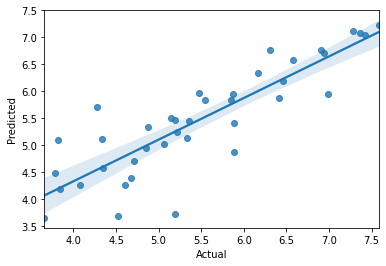

In [34]:
#Visualizing the predicted vs actual data

sns.regplot(x=y_test,y=y_test_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

In [35]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error", metrics.mean_squared_error(y_test, y_test_pred))

Mean Absolute Error: 0.4059147841415388
Mean Squared Error 0.3151361795821418


This is the average error made by the model in predicting the labels.

##  Model Evaluation and Model Tuning
### Let us evaluate how well the our data fits the model. 

### Let us use Ridge regularization score to check if our model overfits.

In [36]:
from sklearn.linear_model import Ridge,RidgeCV
ridgeCV =RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize=True)
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [37]:
ridgeCV.alpha_

0.09099999999999998

In [38]:
ridge_reg = Ridge(alpha=ridgeCV.alpha_)
ridge_reg.fit(X_test, y_test)

Ridge(alpha=0.09099999999999998)

In [39]:
ridge_reg.score(X_test, y_test)*100

81.08944024161315

In [41]:
#checking how 
y_test_pred = ridge_reg.predict((scalar.transform([[0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])))
y_test_pred 

array([6.98315527])

### We could see that after regularization the accuracy could be increasd upto 81%.



## Saving the model using PICKLE

In [42]:
import pickle
filename = 'Finalized_Happiness.pickle'
pickle.dump(reg,open(filename,'wb'))

In [43]:
#prediction using saved model

loaded = pickle.load(open(filename,'rb'))
yhat = (loaded.predict(scalar.transform([[0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630]])))
print("The predicted value for the given input features is:", yhat)

The predicted value for the given input features is: [7.0707803]


In [44]:
#Let us try with different model.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
#predicting the test datasets
y_test_pred = randomforest.predict(X_test)
accuracy = metrics.r2_score(y_test, y_test_pred)*100
print("The prediction of test dataset:", accuracy)

The prediction of test dataset: 72.89027090823001


## Let us tune the parameters using GridsearchCV

In [46]:
#Hyperparameter tuning
params = {'n_estimators':[28], 'criterion':['mae','mse'],'max_depth':[10,17,43,23,15],'min_samples_split':[2,8,5,14,10]}
grid = GridSearchCV(randomforest, param_grid=params)
grid.fit(X_train, y_train)
print("The best parameters:",grid.best_params_)

The best parameters: {'criterion': 'mae', 'max_depth': 10, 'min_samples_split': 14, 'n_estimators': 28}


In [47]:
#instantiating randomforest with best parameters obtained
randomforest = grid.best_estimator_
randomforest.fit(X_train, y_train)
y_test_pred = randomforest.predict(X_test)


In [48]:
#checking the score prediction on test data set
accuracy = metrics.r2_score(y_test, y_test_pred)*100
accuracy

72.74167680621704

# Conclusion:

1. We used Standard Error, Economy (GDP per Capita), Family	Health (Life Expectancy), Freedom, Trust (Government Corruption) and Generosity features to predict the Happiness Score of the country.
2. We analysed the relationship between the happiness score and six factors.
3. We tried to handle outliers based on some features having outliers.
4. Finally we can say that GDP per capita, social support, healthy life expectancy and freedom to make your own life choices had the greatest impact on happiness scores.
5. We built the model to predict Happiness score by spliting the dataset into test and train data sets. 
   Using Linear regression model we could fit the data and by applying regularization techniques We obtained 81% of accuracy of 
   predicting data.
6. Saved the model using Pickle so as to use in future case.
6. Using RandomForest Algorithm and GridCV Hyperparameter optimization techniques, the accuracy score was 74.47%.
